In [1]:
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sci
import glob
import networkx as nx
#import Bio.KEGG.KGML.KGML_parser as keg

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import gseapy as gp

python 3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]
numpy 1.24.3
pandas 1.5.3
matplotlib 3.7.1


In [2]:
lib_list=gp.get_library_name(organism='Human')
lib_list

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbations_GEO_2022',
 'DisG

In [3]:
lib_list=['DSigDB',
 'DisGeNET',
 'GO_Biological_Process_2023',
 'GO_Molecular_Function_2023',
 'GeneSigDB',
 'KEGG_2021_Human',
 'Reactome_2022',
 'WikiPathway_2021_Human',
 'dbGaP']

In [4]:
res_df_save=pd.DataFrame(columns=['epval', 'Term', 'P-value', 'Adjusted P-value', 'Genes'])
res_df_vis=pd.DataFrame()

enr = gp.enrichr(gene_list=['F11R','PTGIR'],
                 gene_sets=['DisGeNET','GO_Molecular_Function_2023',
                            'GO_Biological_Process_2023','KEGG_2021_Human','Reactome_2022','DSigDB'],
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None) # don't write to disk

df1=enr.results
df1

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,DisGeNET,Sinus histiocytosis,1/9,0.000900,0.037904,0,0,2498.750000,17524.581572,F11R
1,DisGeNET,"Asthma, Aspirin-Induced",1/20,0.001999,0.037904,0,0,1051.526316,6535.342984,PTGIR
2,DisGeNET,Arteriosclerosis,2/1087,0.002951,0.037904,0,0,37826.000000,220355.661761,PTGIR;F11R
3,DisGeNET,Neoplastic disease,1/31,0.003098,0.037904,0,0,665.600000,3845.250708,F11R
4,DisGeNET,Atherosclerosis,2/1134,0.003212,0.037904,0,0,37732.000000,216612.245693,PTGIR;F11R
...,...,...,...,...,...,...,...,...,...,...
175,DSigDB,Tetradioxin CTD 00006848,1/3768,0.341313,0.375262,0,0,4.308734,4.631700,F11R
176,DSigDB,METHYL METHANESULFONATE CTD 00006307,1/3864,0.349081,0.375262,0,0,4.176806,4.395883,F11R
177,DSigDB,Retinoic acid CTD 00006918,1/4258,0.380482,0.399042,0,0,3.697674,3.573128,F11R
178,DSigDB,cyclosporin A CTD 00007121,1/4825,0.424307,0.434410,0,0,3.145522,2.696649,F11R


In [12]:
sig_terms=['Neoplastic disease', 'Protein Localization To Plasma Membrane (GO:0072659)', 'TGF-beta Receptor Signaling In EMT (Epithelial To Mesenchymal Transition) R-HSA-2173791']
sig_term_replace_dic={'TGF-beta Receptor Signaling In EMT (Epithelial To Mesenchymal Transition) R-HSA-2173791': 'TGF-beta Receptor Signaling In EMT\n(Epithelial To Mesenchymal Transition)',
                      'Protein Localization To Plasma Membrane (GO:0072659)': 'Protein Localization To Plasma Membrane\n(GO:0072659)'}
df2=df1.loc[df1['Term'].isin(sig_terms)].sort_values(by='Adjusted P-value')
df2['Term']=df2['Term'].replace(sig_term_replace_dic)
df2

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
114,Reactome_2022,TGF-beta Receptor Signaling In EMT\n(Epithelia...,1/16,0.001599,0.009875,0,0,1332.200000,8576.898814,F11R
98,GO_Biological_Process_2023,Protein Localization To Plasma Membrane\n(GO:0...,1/137,0.013653,0.015661,0,0,146.044118,627.080486,F11R
3,DisGeNET,Neoplastic disease,1/31,0.003098,0.037904,0,0,665.600000,3845.250708,F11R


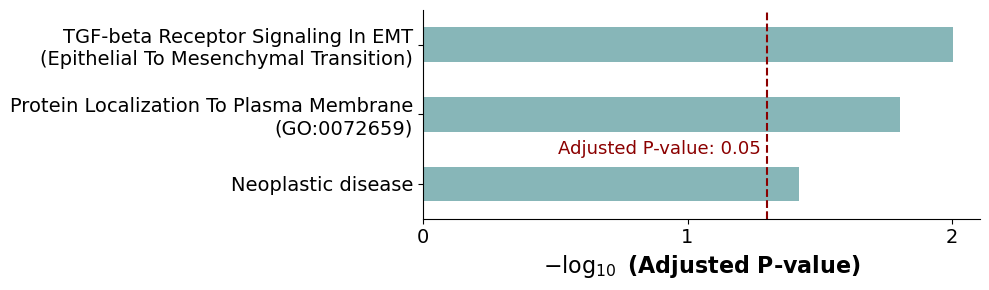

In [20]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
                 
from gseapy import barplot, dotplot

ax = barplot(df2,
             #group='Gene_set', # set group, so you could do a multi-sample/library comparsion
             cutoff=0.05,
             size=20,
             top_term=100,
             figsize=(10,3),
             dpi=300,
             color=['cadetblue']) # set colors for group)

_=ax.set_xlabel(ax.get_xlabel(), fontsize=16)
_=ax.tick_params(axis='both', labelsize=14)
_=ax.axvline(-np.log10(0.05), color='darkred', linestyle='--')
_=ax.text(-np.log10(0.053), 0.5, 'Adjusted P-value: 0.05', va='center', ha='right', color='darkred', fontsize=13)

plt.gcf().savefig('figures/Fig3b.png', dpi=300)#, bbox_inches=extent.expanded(1.1, 1.2))